# Arboles de decisión

Los Arboles de Decision son diagramas con construcciones lógicas, muy similares a los sistemas de predicción basados en reglas, que sirven para representar y categorizar una serie de condiciones que ocurren de forma sucesiva, para la resolución de un problema. Los Arboles de Decision están compuestos por nodos interiores, nodos terminales y ramas que emanan de los nodos interiores. Cada nodo interior en el árbol contiene una prueba de un atributo, y cada rama representa un valor distinto del atributo. Siguiendo las ramas desde el nodo raíz hacia abajo, cada ruta finalmente termina en un nodo terminal creando una segmentación de los datos. 

Algunas razones de aprender arboles de decisión:
- Son útiles tanto para problemas de regresión como de clasificación.
- Son populares.
- Son la base de enfoques de modelado más sofisticados.
- Demuestran una forma diferente de "pensar" que los modelos que hemos estudiado hasta ahora.


Para comprender mejor el concepto de árbol de decisión, supongamos que Nuestra meta es predecir el Salario de un jugador de béisbol basado en Años (número de años jugando en las ligas mayores) e Hits (número de golpes que hizo el año anterior). Aquí están los datos de la formación, representados visualmente (el salario bajo es azul/verde, el alto es rojo/amarillo):<br>

Datos de los jugadores de las Grandes Ligas de Béisbol de 1986-87: <br>

Años (eje x): número de años jugando en las ligas mayores.<br>
Hits (eje y): número de impactos en el año anterior.

![beisol_arbol](img/beisol_arbol.png)

Ejercicio en grupo:<br>
Los datos anteriores son nuestros datos de formación.<br>
Queremos construir un modelo que prediga el Salario de los futuros jugadores basado en Años y Hits.<br>
Vamos a "segmentar" el espacio de características en regiones, y luego usar el Salario medio en cada región como el Salario predicho para futuros jugadores.<br>
Intuitivamente, usted quiere maximizar la similitud (u "homogeneidad") dentro de una región dada, y minimizar la similitud entre diferentes regiones.<br>
Reglas de segmentación:
- Sólo se pueden utilizar líneas rectas, dibujadas de una en una.
- Su línea debe ser vertical u horizontal.
- Su línea se detiene cuando choca con una línea existente.


A continuación, se muestra un árbol de regresión que ha sido ajustado a los datos por una computadora. (Hablaremos más adelante sobre cómo funciona realmente el algoritmo de adaptación.) Tenga en cuenta que el salario se mide en miles y se ha transformado en registros.

![arbol_computadora](img/arbol_computadora.png)

Empiece por arriba y examine la primera "regla de partición" (Años < 4,5).<br>
Si la regla es True para un jugador dado, sigue la rama izquierda. Si la regla es Falsa, siga la rama derecha.<br>
Continúe hasta llegar al fondo. El Salario predicho es el número en ese "cubo" en particular.<br>
Nota: Los Años y los Hits son ambos enteros, pero la convención es etiquetar estas reglas usando el punto medio entre valores adyacentes.<br>
Ejemplo de predicciones:
- 3 años, entonces se predice 5.11($ 1000 x e5.11 ~ $166000)
- 5 años y 100 hits, entonces se predice 6.00($ 1000 x e6.00 ~ $403000)
- 8 años y 120 hits, entonces se predice 6.74($ 1000 x e6.74 ~ $846000)

¿Cómo se nos ocurrieron los números de la parte inferior del árbol? <br>Cada número es sólo el salario medio en los datos de entrenamiento de los jugadores que cumplen con ese criterio.


Aquí está el mismo diagrama que antes, dividido en las tres regiones:

![arbol_region](img/arbol_region.png)

Este diagrama es esencialmente una combinación de los dos diagramas anteriores. En R1, el salario medio del registro fue de 5.11. En R2, el salario medio del registro fue de 6.00. En R3, el salario medio del registro fue de 6.74. Por lo tanto, esos valores se utilizan para predecir datos fuera de la muestra.

Vamos a introducir algo de terminología:

![terminologia_arbol](img/salary_tree_annotated.png)

¿Cómo podría interpretar el "significado" de este árbol?

Los Años son el factor más importante que determina el Salario, con un menor número de Años que corresponden a un Salario más bajo.<br>
Para un jugador con un número menor de Años, los Impactos no son un factor importante para determinar el Salario.<br>
Para un jugador con un número mayor de Años, los Impactos son un factor importante que determina el Salario, con un mayor número de Impactos que corresponde a un Salario mayor.<br>

Lo que hemos visto hasta ahora indica las ventajas y desventajas de los árboles de decisión:

- Altamente interpretable
- Puede visualizarse gráficamente
- La predicción es rápida


Desventajas:

- La precisión predictiva no es tan alta como algunos métodos de aprendizaje supervisado
- Puede fácilmente sobredimensionar los datos de entrenamiento


Ejemplo de árbol de regresión con scikit-learn

In [ ]:
setwd("D:/iush2020/Mineria de datos/notebooks/datasets")

In [1]:
train <- read.csv('https://raw.githubusercontent.com/justmarkham/DAT5/master/data/vehicles_train.csv')

In [2]:
str(train)

'data.frame':	14 obs. of  5 variables:
 $ price: int  22000 14000 13000 9500 9000 4000 3000 2000 3000 1900 ...
 $ year : int  2012 2010 2010 2009 2007 2006 2004 2004 2003 2003 ...
 $ miles: int  13000 30000 73500 78000 47000 124000 177000 209000 138000 160000 ...
 $ doors: int  2 2 4 4 4 2 4 4 2 4 ...
 $ type : Factor w/ 2 levels "car","truck": 1 1 1 1 1 1 1 2 1 1 ...


In [ ]:
train

In [3]:
train$type <- ifelse(train$type == "car",0,1)

In [4]:
str(train)

'data.frame':	14 obs. of  5 variables:
 $ price: int  22000 14000 13000 9500 9000 4000 3000 2000 3000 1900 ...
 $ year : int  2012 2010 2010 2009 2007 2006 2004 2004 2003 2003 ...
 $ miles: int  13000 30000 73500 78000 47000 124000 177000 209000 138000 160000 ...
 $ doors: int  2 2 4 4 4 2 4 4 2 4 ...
 $ type : num  0 0 0 0 0 0 0 1 0 0 ...


In [5]:
X = train[,2:5]

In [6]:
X

year,miles,doors,type
<int>,<int>,<int>,<dbl>
2012,13000,2,0
2010,30000,2,0
2010,73500,4,0
2009,78000,4,0
2007,47000,4,0
2006,124000,2,0
2004,177000,4,0
2004,209000,4,1
2003,138000,2,0


In [7]:
y = train[,1]

In [8]:
y

[1] 22000 14000 13000  9500  9000  4000  3000  2000  3000  1900  2500  5000
[13]  1800  1300

In [9]:
X_train = X[1:11,]
X_test = X[12:14,]

In [10]:
y_train = y[1:11]
y_test = y[12:14]

In [11]:
install.packages("tree")

Installing package into 'C:/Users/JHOVANNY/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\JHOVANNY\AppData\Local\Temp\RtmpKWSRxl\downloaded_packages


In [12]:
library(tree)

Warning message:
"package 'tree' was built under R version 3.6.3"


In [ ]:
train

In [13]:
treereg = tree(price ~ + year + miles + doors + type, data = train)

In [14]:
summary(treereg)


Regression tree:
tree(formula = price ~ +year + miles + doors + type, data = train)
Variables actually used in tree construction:
[1] "year"
Number of terminal nodes:  2 
Residual mean deviance:  10010000 = 120100000 / 12 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4500.0  -897.2  -361.1     0.0   444.4  8500.0 

creando el diagrama

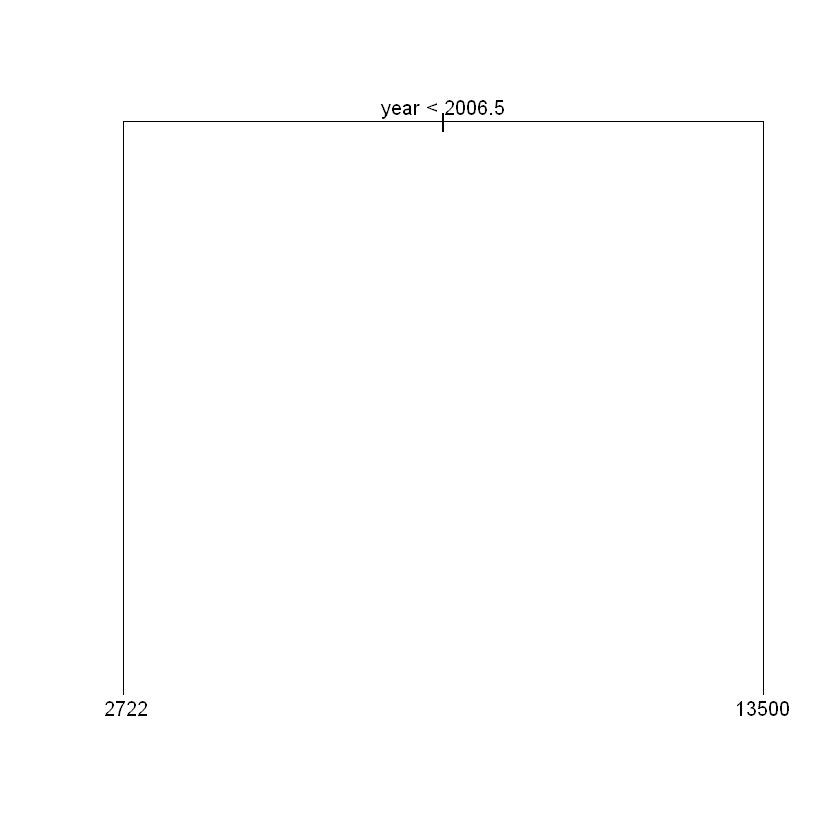

In [15]:
plot(treereg)
text(treereg, pretty = 0)

<b>Nodos internos:</b><br>

"muestras" es el número de observaciones en ese nodo antes de la división<br>
"mse" es el error cuadrático medio calculado comparando los valores reales de respuesta en ese nodo con el valor medio de respuesta en ese nodo.<br>
primera línea es la condición usada para dividir ese nodo (ir a la izquierda si es verdadero, ir a la derecha si es falso)<br>

<b>Hojas:</b>

"muestras" es el número de observaciones en ese nodo<br>
"valor" es el valor medio de la respuesta en ese nodo<br>
"mse" es el error cuadrático medio calculado comparando los valores reales de respuesta en ese nodo con "valor".


Probando el modelo con datos de entrenamiento

In [16]:
train <- read.csv('https://raw.githubusercontent.com/justmarkham/DAT5/master/data/vehicles_test.csv')

In [17]:
train$type <- ifelse(train$type == "car",0,1)

In [18]:
X = train[,2:5]
y = train[,1]

In [19]:
prediciones = predict(object = treereg, newdata = X)

In [21]:
y

[1]  3000  6000 12000

In [20]:
prediciones

1         2         3 
 2722.222  2722.222 13500.000

Arboles de clasificación

Los árboles de clasificación son muy similares a los árboles de regresión. He aquí una rápida comparación:

|árboles de regresión|árboles de clasificación|
      |---|---|
      |predecir una respuesta continua|predecir una respuesta categórica|
      |predecir usando la respuesta media de cada hoja |predecir usando la clase más común de cada hoja|
      |las divisiones se eligen para minimizar MSE|las divisiones se eligen para minimizar el índice de Gini (discutido a continuación)|

Criterios de partición para árboles de clasificación<br>
A continuación, se presentan opciones comunes para los criterios de partición:


- tasa de error de clasificación: fracción de las observaciones de entrenamiento en una región que no pertenece a la clase más común
- Índice de Gini: medida de la varianza total entre clases en una región
- centropía cruzada: numéricamente similar al índice de Gini


El objetivo de la división es aumentar la "pureza del nodo", y resulta que el índice de Gini y la cruzentropía son mejores medidas de pureza que la tasa de error de clasificación. El índice de Gini es más rápido de calcular que el de centrocross, por lo que generalmente es el preferido (y es usado por scikit-learn por defecto).

Ejemplos de cálculos del índice de Gini

Digamos que estamos prediciendo la supervivencia en el Titanic. En un nodo en particular, hay 25 individuos, de los cuales 10 sobrevivieron y 15 murieron. Así es como calculamos el índice de Gini antes de hacer una división:<br>

![gini](img/math1.svg)


El valor máximo del índice Gini es de 0,5, y se produce cuando las clases están perfectamente equilibradas en un nodo. El valor mínimo del índice Gini es 0, y ocurre cuando sólo hay una clase representada en un nodo. Así, un nodo con un índice de Gini más bajo se dice que es más "puro".


Al decidir entre particiones, el algoritmo del árbol de decisión elige la partición que maximiza la pureza del nodo resultante. Supongamos que el género fue la división que se está considerando, y los nodos resultantes son los siguientes:

Hombres: 2 sobrevivieron, 13 murieron<br>
Hembras: 8 sobrevivieron, 2 murieron


Para evaluar esta división, calculamos el promedio ponderado de los índices de Gini de los nodos resultantes:<br>

![gini](img/math2.svg)



Por lo tanto, la disminución del índice de Gini (y el aumento de la pureza) a partir de la división en sexos es de 0,21. El algoritmo del árbol de decisión elegirá esta división si ninguna otra división resulta en una mayor ganancia en pureza.

Ejemplo de árbol de clasificación en scikit-learn

In [22]:
titanic <- read.csv('https://raw.githubusercontent.com/justmarkham/DAT5/master/data/titanic_train.csv')

In [23]:
head(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


Elijamos nuestra variable de respuesta y algunas características, y repasemos cómo manejar las características categóricas:

Sobrevivió: Esta es nuestra variable de respuesta, y ya está codificada como 0=muerto y 1=vivo.<br>
Clase P: Estas son las categorías de clase de pasajeros (1=primera clase, 2=segunda clase, 3=tercera clase). Están ordenados lógicamente, así que los dejaremos como están. (Si el árbol se divide en esta característica, las divisiones ocurrirán en 1.5 o 2.5.)<br>
Sexo: Esta es una categoría binaria, por lo que debemos codificarla como 0=mujer y 1=hombre. (Si el árbol se divide en esta característica, la división ocurrirá en 0.5.)<br>
Edad: Esta es una característica numérica, pero necesitamos rellenar los valores que faltan.<br>
Embarcado: Este es el puerto de donde salieron. Hay tres categorías desordenadas, así que debemos crear variables ficticias y dejar caer un nivel como de costumbre.


In [24]:
# encode female as 0 and male as 1
titanic$Sex <- ifelse(titanic$Sex == "female",0,1)

In [25]:
# fill in the missing values for age with the mean age
titanic$Age <- ifelse(is.na(titanic$Age), mean(titanic$Age, na.rm=TRUE), titanic$Age)

In [26]:
# create three dummy variables, drop the first dummy variable, and store the two remaining columns as a DataFrame
install.packages("dummies")
library(dummies)
titanic_dummy = dummy.data.frame(titanic, names = c("Embarked") , sep = ".")


Installing package into 'C:/Users/JHOVANNY/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'dummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\JHOVANNY\AppData\Local\Temp\RtmpKWSRxl\downloaded_packages


dummies-1.5.6 provided by Decision Patterns


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"


In [27]:
titanic_dummy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.,Embarked.C,Embarked.Q,Embarked.S
,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<int>,<int>,<int>,<int>
1,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,A/5 21171,7.2500,,0,0,0,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38.00000,1,0,PC 17599,71.2833,C85,0,1,0,0
3,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,STON/O2. 3101282,7.9250,,0,0,0,1
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,113803,53.1000,C123,0,0,0,1
5,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,373450,8.0500,,0,0,0,1
6,6,0,3,"Moran, Mr. James",1,29.69912,0,0,330877,8.4583,,0,0,1,0
7,7,0,1,"McCarthy, Mr. Timothy J",1,54.00000,0,0,17463,51.8625,E46,0,0,0,1
8,8,0,3,"Palsson, Master. Gosta Leonard",1,2.00000,3,1,349909,21.0750,,0,0,0,1
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.00000,0,2,347742,11.1333,,0,0,0,1


In [28]:
titanic_dummy = titanic_dummy[,0:14]

In [29]:
titanic_dummy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.,Embarked.C,Embarked.Q
,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<int>,<int>,<int>
1,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,A/5 21171,7.2500,,0,0,0
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38.00000,1,0,PC 17599,71.2833,C85,0,1,0
3,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,STON/O2. 3101282,7.9250,,0,0,0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,113803,53.1000,C123,0,0,0
5,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,373450,8.0500,,0,0,0
6,6,0,3,"Moran, Mr. James",1,29.69912,0,0,330877,8.4583,,0,0,1
7,7,0,1,"McCarthy, Mr. Timothy J",1,54.00000,0,0,17463,51.8625,E46,0,0,0
8,8,0,3,"Palsson, Master. Gosta Leonard",1,2.00000,3,1,349909,21.0750,,0,0,0
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.00000,0,2,347742,11.1333,,0,0,0


In [31]:
titanic_x = titanic_dummy[,c("Survived","Pclass", "Sex", "Age", "Embarked.C", "Embarked.Q")]

In [32]:
titanic_x$Survived <- ifelse(titanic_x$Survived == 1, "Vivo", "Muerto")

In [33]:
titanic_x$Survived = as.factor(titanic_x$Survived)

In [34]:
summary(titanic_x)

   Survived       Pclass           Sex              Age          Embarked.C    
 Muerto:549   Min.   :1.000   Min.   :0.0000   Min.   : 0.42   Min.   :0.0000  
 Vivo  :342   1st Qu.:2.000   1st Qu.:0.0000   1st Qu.:22.00   1st Qu.:0.0000  
              Median :3.000   Median :1.0000   Median :29.70   Median :0.0000  
              Mean   :2.309   Mean   :0.6476   Mean   :29.70   Mean   :0.1886  
              3rd Qu.:3.000   3rd Qu.:1.0000   3rd Qu.:35.00   3rd Qu.:0.0000  
              Max.   :3.000   Max.   :1.0000   Max.   :80.00   Max.   :1.0000  
   Embarked.Q     
 Min.   :0.00000  
 1st Qu.:0.00000  
 Median :0.00000  
 Mean   :0.08642  
 3rd Qu.:0.00000  
 Max.   :1.00000  

In [35]:
X_train = titanic_x[1:600,]
X_test = titanic_x[601:891,]

In [36]:
treeclf = tree(Survived ~ ., data = X_train)

In [37]:
treeclf

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 600 804.30 Muerto ( 0.60667 0.39333 )  
   2) Sex < 0.5 223 251.30 Vivo ( 0.25112 0.74888 )  
     4) Pclass < 2.5 119  53.24 Vivo ( 0.05882 0.94118 ) *
     5) Pclass > 2.5 104 143.80 Vivo ( 0.47115 0.52885 )  
      10) Embarked.Q < 0.5 80 109.70 Muerto ( 0.56250 0.43750 ) *
      11) Embarked.Q > 0.5 24  21.63 Vivo ( 0.16667 0.83333 ) *
   3) Sex > 0.5 377 358.90 Muerto ( 0.81698 0.18302 )  
     6) Age < 13.5 24  33.10 Vivo ( 0.45833 0.54167 )  
      12) Pclass < 2.5 8   0.00 Vivo ( 0.00000 1.00000 ) *
      13) Pclass > 2.5 16  19.87 Muerto ( 0.68750 0.31250 ) *
     7) Age > 13.5 353 308.80 Muerto ( 0.84136 0.15864 )  
      14) Pclass < 1.5 78  92.80 Muerto ( 0.71795 0.28205 ) *
      15) Pclass > 1.5 275 205.80 Muerto ( 0.87636 0.12364 ) *

In [38]:
predicciones = predict(object = treeclf, newdata = X_test, type = "class")

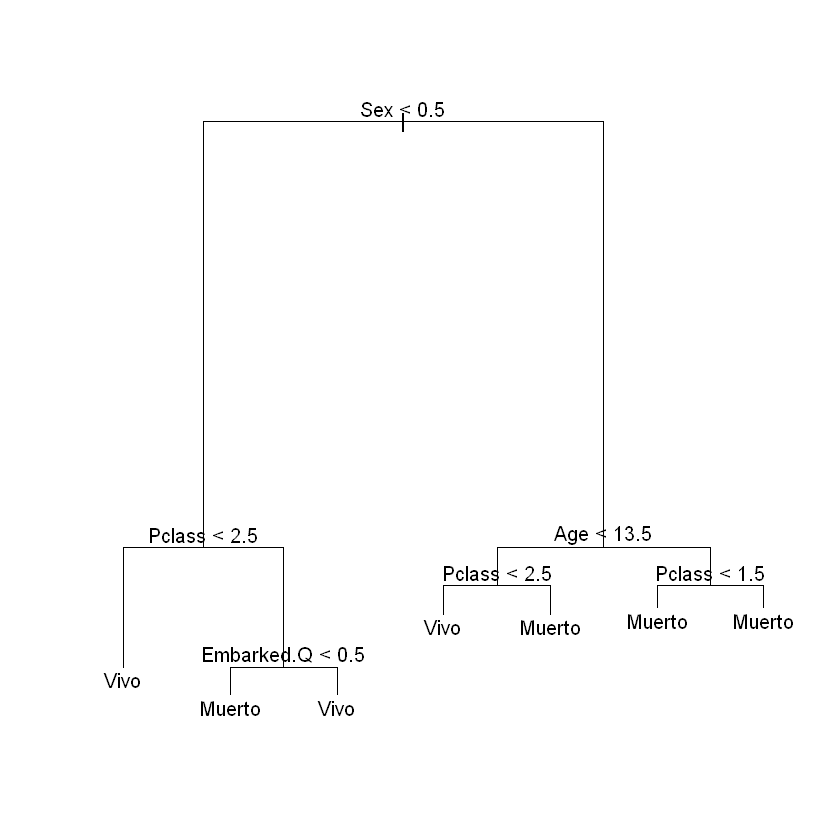

In [39]:
plot(treeclf)
text(treeclf, pretty = 0)

In [40]:
table(predicciones, X_test$Survived)

            
predicciones Muerto Vivo
      Muerto    178   49
      Vivo        7   57

In [41]:
(178+57)/290

[1] 0.8103448

He aquí algunas ventajas y desventajas de los árboles de decisión de los que aún no hemos hablado:

- Pueden especificarse como una serie de reglas, y se piensa que se aproximan más a la toma de decisiones humanas que otros modelos.
- Altamente interpretables incluso mas que la regresion lineal
- Pueden ser utilizados para regresion o clasificacion
- Puede visualizarse gráficamente
- Tiende a ignorar características irrelevantes
- Las funciones no necesitan escalado


Desventajas:

- El rendimiento (generalmente) no es competitivo con los mejores métodos de aprendizaje supervisado
- Puede fácilmente sobredimensionar los datos de entrenamiento (se requiere afinación)
- Pequeñas variaciones en los datos pueden resultar en un árbol completamente diferente (alta varianza)
- La división binaria recurrente toma decisiones "localmente óptimas" que pueden no resultar en un árbol globalmente óptimo.
- No suele funcionar bien si las clases están muy desequilibradas
- No tiende a funcionar bien con conjuntos de datos muy pequeños


Es de resaltar que existe variantes del algoritmo de árbol de decisión: 

algoritmos por particionamiento: 
    
- C4.5
- CART
- ID3
- CHAID


Algoritmos por cobertura:
- AQ
- CN2

# Random Forests (Bosques aleatorios)

Por que no utilizar un cojunto de arboles para predecir. Esta es la idea detras de Random Forest, la combinacion de multiples arboles de decision. <br>
los bosques aleatorios han ganado gran popularidad y acogida por la comunidad practicante de aprendizaje automatico debido a su buen rendimiento en tareas de clasificacion, escalabilidad y facilidad de uso. Los arboles aleatorios promedian multiples arboles de decision(profundos) que sufren indivudualmente una alta varianza, para construir un modelo mas robusto que sea menos suceptible a tener sobre ajuste y por consiguiente tenga mejor rendimiento o generalizacion.

Es una tecnica de aprendizaje en conjunto  o ensamble learning, tecnica muy poderosa y con mucha popularidad en consursos de aprendizaje automatico.<br>
Se basa en la salida de muchos modelos individuales que combinan dichas salidas de una manera inteligente para producir un modelo de aprendizaje automatico mas fuerte y robusto.<br>
El aprendizaje en conjunto funciona mejor cuando los modelos individuales que componen el conjunto son tan diferentes entre sí como sea posible.

In [44]:
install.packages("randomForest")

Installing package into 'C:/Users/JHOVANNY/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\JHOVANNY\AppData\Local\Temp\RtmpKWSRxl\downloaded_packages


In [45]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 3.6.3"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [ ]:
X_train

In [46]:
bosque = randomForest(Survived ~ ., data = X_train, ntree = 42)

In [47]:
predicciones = predict(object = bosque, newdata = X_test, type = "class")

In [48]:
table(predicciones, X_test$Survived)

            
predicciones Muerto Vivo
      Muerto    175   42
      Vivo       10   64

In [49]:
importance(bosque)

,MeanDecreaseGini
Pclass,21.824470
Sex,80.495576
Age,28.569743
Embarked.C,3.699094
Embarked.Q,4.177722


Ventajas de los bosques aleatorios

- El rendimiento es competitivo con los mejores métodos de aprendizaje supervisado
- Proporciona una estimación más fiable de la importancia de las características

Desventajas

- Menos interpretable
- Más lento para entrenar
- Más lento de predecir